# Aula 3 Imersão Dados Alura

# Importação Dos Pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importação Dos Dados

In [2]:
url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

data = pd.read_csv(url, compression = 'zip')

# Análise e Limpeza Dos Dados

In [3]:
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
data.columns = data.columns.str.replace('-', '')

In [203]:
data.rename(columns = {'droga':'composto'}, inplace=True)

In [204]:
data.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Desafio 1 - Criar tabelas de frequência com groupby

In [226]:
data.groupby(['dose', 'tempo'])['tratamento'].value_counts(normalize=True)

dose  tempo  tratamento  
D1    24     com_droga       0.922542
             com_controle    0.077458
      48     com_droga       0.921222
             com_controle    0.078778
      72     com_droga       0.921423
             com_controle    0.078577
D2    24     com_droga       0.921513
             com_controle    0.078487
      48     com_droga       0.921715
             com_controle    0.078285
      72     com_droga       0.921493
             com_controle    0.078507
Name: tratamento, dtype: float64

In [256]:
pd.pivot_table(data, columns='tratamento', values='id', index=['dose', 'tempo'], aggfunc='count', margins=True).apply(lambda x: x * 100/float(x['All']), axis=1).round(2)

tratamento  com_controle  com_droga    All
dose tempo                                
D1   24             7.75      92.25  100.0
     48             7.88      92.12  100.0
     72             7.86      92.14  100.0
D2   24             7.85      92.15  100.0
     48             7.83      92.17  100.0
     72             7.85      92.15  100.0
All                 7.84      92.16  100.0

# Desafio 2 - Normalizar o crosstab pela coluna

In [240]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], normalize='columns', margins=True)

tratamento  com_controle  com_droga       All
dose tempo                                   
D1   24         0.161308   0.163341  0.163181
     48         0.183816   0.182750  0.182834
     72         0.164523   0.164024  0.164063
D2   24         0.163451   0.163158  0.163181
     48         0.163451   0.163614  0.163601
     72         0.163451   0.163113  0.163139

In [257]:
pd.pivot_table(data, columns='tratamento', values='id', index=['dose', 'tempo'], aggfunc='count', margins=True).apply(lambda x: x * 100/float(x['All']), axis=0).round(2)

tratamento  com_controle  com_droga     All
dose tempo                                 
D1   24            16.13      16.33   16.32
     48            18.38      18.28   18.28
     72            16.45      16.40   16.41
D2   24            16.35      16.32   16.32
     48            16.35      16.36   16.36
     72            16.35      16.31   16.31
All               100.00     100.00  100.00

# Desafio 3 e 4 - Explorar outros agregadores e explorar o melt

In [271]:
data_melt = pd.melt(data, ['id', 'tempo', 'dose', 'composto', 'tratamento'])
data_melt.head()

,id,tempo,dose,composto,tratamento,variable,value
0,id_000644bb2,24,D1,b68db1d53,com_droga,g0,1.0620
1,id_000779bfc,72,D1,df89a8e5a,com_droga,g0,0.0743
2,id_000a6266a,48,D1,18bb41b2c,com_droga,g0,0.6280
3,id_0015fd391,48,D1,8c7f86626,com_droga,g0,-0.5138
4,id_001626bd3,72,D2,7cbed3131,com_droga,g0,-0.3254


In [277]:
pd.crosstab(data_melt['variable'],columns=data_melt['composto'], values = data_melt['value'], aggfunc='max')

composto,00199ff52,00251fc41,00321ea80,0034c0847,0060e686f,00898e82c,009a5da05,00d2de1d8,00dba5599,014d175d7,...,ff32d9c31,ff539cce7,ff551f3a3,ff55b75c9,ff5a3ecb1,ff9565933,ffd66e220,ffe357f8f,ffed8e1c9,fff7d208d
variable,,,,,,,,,,,,,,,,,,,,,
c0,0.2898,0.7215,1.0740,-0.0426,1.0490,1.2170,1.1670,-0.0232,-0.4585,0.8964,...,0.4442,1.9660,0.9326,-0.2720,1.0850,1.0970,0.4545,0.1491,0.6594,1.2630
c1,0.6579,0.4745,1.4240,0.2799,0.7495,0.4118,0.8997,-0.1481,-1.1760,0.8072,...,-1.0870,0.3900,1.4100,0.5204,0.4366,-0.1266,-0.1455,-0.1066,0.5722,0.9797
c10,0.4775,0.7099,1.4600,0.3703,1.2260,0.9032,0.5234,-0.1703,-0.2788,0.8541,...,0.6227,1.8190,1.2300,-0.2272,1.1560,0.5891,0.5435,0.6947,0.5108,1.3420
c11,1.1870,0.8936,1.0680,0.3413,1.2580,0.3425,0.7153,-0.6653,0.0465,0.4893,...,0.1484,1.8190,1.1600,-0.0108,0.7779,0.0777,0.8800,0.1439,0.5442,1.0580
c12,0.6348,1.2090,0.7955,0.5915,1.1780,0.8580,1.2660,0.1699,-0.3072,0.2399,...,0.1224,1.4920,0.8599,0.7794,-0.0806,-0.0884,0.4702,-2.0910,1.1490,0.9738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g95,1.2170,0.1426,1.8620,1.2630,0.4046,1.2200,0.7415,3.1720,-0.0072,1.5660,...,3.3440,1.2920,0.1446,1.4110,0.7428,1.3890,0.6726,0.8374,0.9843,0.1093
g96,1.0210,0.7714,1.5860,1.0060,1.7030,0.4467,1.1630,1.2200,-0.7570,0.5188,...,-0.6854,0.5561,1.2880,0.1472,0.2796,0.6185,1.0720,0.5513,0.6993,1.9900
g97,0.0182,0.9746,0.7416,0.2991,0.7966,0.2968,0.9008,0.3537,0.3063,0.9577,...,1.2550,-0.2985,0.1374,0.5406,0.0941,0.2044,0.0000,-0.0580,1.1190,0.5835


In [278]:
pd.crosstab(data_melt['variable'],columns=data_melt['composto'], values = data_melt['value'], aggfunc='min')

composto,00199ff52,00251fc41,00321ea80,0034c0847,0060e686f,00898e82c,009a5da05,00d2de1d8,00dba5599,014d175d7,...,ff32d9c31,ff539cce7,ff551f3a3,ff55b75c9,ff5a3ecb1,ff9565933,ffd66e220,ffe357f8f,ffed8e1c9,fff7d208d
variable,,,,,,,,,,,,,,,,,,,,,
c0,-0.6404,-1.4040,-1.1370,-1.4510,-0.9613,-0.8750,-1.5290,-3.1810,-0.4585,-0.6981,...,-3.1460,-0.5755,-1.0300,-1.9370,-0.5201,-1.1480,-0.6614,0.1491,-1.8880,-0.4349
c1,-0.1112,-0.9975,-1.2560,-1.6700,-0.4627,-0.9426,-1.0930,-5.5970,-1.1760,-0.4821,...,-4.9120,-4.2780,0.0403,-5.2350,-0.9127,-2.7830,-1.4580,-0.1066,-0.0047,-0.2737
c10,-1.3700,-0.2265,-0.3714,-1.7910,-0.4901,-0.9044,-1.1690,-3.4310,-0.2788,-1.0750,...,-2.3810,-1.8140,-0.8730,-4.1740,-0.6700,-2.1910,-1.0530,0.6947,-1.1050,-0.1891
c11,-1.1020,-0.2618,-1.0420,-0.8112,-1.0060,-0.9856,-1.8260,-5.6060,0.0465,-1.5030,...,-8.1960,-1.0540,-0.4079,-4.2320,-0.0587,-1.1730,-0.9911,0.1439,-1.3780,0.3774
c12,-0.1546,-0.7765,-0.2489,-2.2490,-0.7576,-0.5981,-0.8559,-6.3930,-0.3072,-0.3263,...,-4.3010,-0.9662,-0.6706,-4.3260,-0.9950,-1.3260,-0.5322,-2.0910,-0.7843,0.0960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g95,-0.5773,-0.4930,-0.8278,-0.3411,-0.4923,-0.3918,-0.6891,0.3754,-0.0072,-0.1190,...,-0.1980,-0.2598,-1.1740,-0.1597,-0.9908,-0.5645,-0.8174,0.8374,-0.7437,-1.2500
g96,-1.5890,-0.8166,-0.7337,-0.5815,-0.1176,-1.2000,-0.9927,0.0758,-0.7570,-1.3430,...,-3.1840,-1.0680,-2.9590,-2.1910,-0.4738,-0.3321,-0.8224,0.5513,-0.8489,-0.7483
g97,-1.0790,-0.1193,-0.9368,-1.1020,-0.1565,-0.6974,-1.1990,-0.3329,0.3063,-0.6363,...,-0.7649,-1.3220,-0.6219,-0.2882,-0.8299,-0.7912,-1.3160,-0.0580,-0.3726,-0.4502


In [279]:
pd.crosstab(data_melt['variable'],columns=data_melt['composto'], values = data_melt['value'], aggfunc='std')

composto,00199ff52,00251fc41,00321ea80,0034c0847,0060e686f,00898e82c,009a5da05,00d2de1d8,014d175d7,015a48b37,...,ff32409d8,ff32d9c31,ff539cce7,ff551f3a3,ff55b75c9,ff5a3ecb1,ff9565933,ffd66e220,ffed8e1c9,fff7d208d
variable,,,,,,,,,,,,,,,,,,,,,
c0,0.308999,0.871709,0.577057,0.579026,0.743162,0.721259,0.963795,1.160842,0.673810,0.783508,...,0.685280,1.195409,0.928658,0.729685,0.607167,0.644304,0.824325,0.446930,0.867825,0.681225
c1,0.300957,0.597942,0.794499,0.742761,0.483204,0.559402,0.776247,2.457103,0.451010,0.487095,...,0.549250,1.425654,1.878246,0.423483,2.507660,0.464039,1.119575,0.534655,0.211260,0.444299
c10,0.745212,0.378752,0.651932,0.734153,0.605751,0.665048,0.617696,1.200235,0.702238,0.423970,...,0.820137,1.215370,1.299099,0.761090,1.380189,0.677524,0.973420,0.582561,0.579264,0.575481
c11,0.782293,0.443580,0.654022,0.426489,0.827613,0.557706,0.994232,1.908833,0.721709,0.672192,...,0.990739,3.162332,1.097625,0.606440,1.616308,0.293809,0.579983,0.622975,0.700678,0.296320
c12,0.277613,0.715619,0.355925,0.917205,0.690740,0.609834,0.751664,2.419196,0.186659,0.397676,...,0.784363,1.622354,0.829385,0.581441,1.880356,0.310255,0.509793,0.407534,0.649299,0.376471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g95,0.813670,0.289197,0.790000,0.599082,0.419494,0.573809,0.553450,1.041928,0.676718,0.706763,...,0.712563,1.240626,0.650503,0.468542,0.691535,0.643124,0.720211,0.643300,0.683642,0.559023
g96,0.909422,0.545782,0.771316,0.584161,0.626752,0.529191,0.842210,0.497724,0.640896,1.106130,...,0.470100,0.902855,0.560340,1.433751,0.834886,0.270622,0.327314,0.703127,0.525937,0.947686
g97,0.436894,0.372444,0.593884,0.516451,0.328741,0.376998,0.772358,0.276461,0.611311,0.787880,...,1.608086,0.703618,0.384943,0.268632,0.309084,0.340995,0.376640,0.486549,0.621540,0.368599


In [280]:
pd.crosstab(data_melt['variable'],columns=data_melt['composto'], values = data_melt['value'], aggfunc='median')

composto,00199ff52,00251fc41,00321ea80,0034c0847,0060e686f,00898e82c,009a5da05,00d2de1d8,00dba5599,014d175d7,...,ff32d9c31,ff539cce7,ff551f3a3,ff55b75c9,ff5a3ecb1,ff9565933,ffd66e220,ffe357f8f,ffed8e1c9,fff7d208d
variable,,,,,,,,,,,,,,,,,,,,,
c0,-0.34605,-0.37950,0.30865,-0.42525,0.43395,0.20215,-0.46385,-1.79050,-0.4585,0.4424,...,-0.80870,0.48485,0.5941,-0.52995,0.30160,-0.49250,0.05720,0.1491,-0.22685,0.66740
c1,0.15420,-0.15780,-0.08600,-0.04025,-0.21230,-0.43310,-0.01340,-3.93950,-1.1760,-0.0219,...,-2.32400,-0.80930,0.7968,-2.66300,0.06110,-1.31430,-0.50130,-0.1066,0.42300,0.11365
c10,-0.20515,0.24190,0.28490,-1.07900,0.18005,0.22265,-0.05055,-2.46700,-0.2788,0.2674,...,-0.87810,-0.51700,0.3356,-1.52250,0.50550,0.01255,-0.08565,0.6947,-0.03515,0.65035
c11,-0.12960,0.17755,0.13085,0.12640,-0.18840,-0.37025,-0.54245,-3.06250,0.0465,0.0420,...,-2.10600,0.22640,0.6066,-1.61150,0.38650,-0.46200,-0.37305,0.1439,-0.37435,0.80840
c12,0.45910,-0.22160,0.29180,-0.68570,0.11440,-0.03245,0.48035,-3.00100,-0.3072,-0.0229,...,-1.38600,0.26925,0.3393,-0.08930,-0.38770,-0.54515,-0.25250,-2.0910,-0.18540,0.65005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g95,-0.09255,0.06640,0.16740,0.19385,0.03890,0.04020,-0.01750,1.71200,-0.0072,0.4688,...,1.32150,1.01345,-0.6256,0.40535,-0.21035,0.08820,0.05795,0.8374,0.75520,-0.73690
g96,-0.05335,0.26560,0.17825,0.17845,0.80405,-0.37575,0.07165,0.77230,-0.7570,0.1602,...,-1.77800,0.16125,0.3785,-0.73140,0.02485,0.01120,0.39685,0.5513,-0.44140,0.64820
g97,-0.71885,0.16335,0.20095,-0.14970,0.07545,0.02190,-0.08915,-0.11820,0.3063,0.3716,...,0.26235,-0.47015,-0.1296,0.00905,-0.35870,-0.49420,-0.51480,-0.0580,0.39415,0.31325


# Estudando a relação entre as variáveis g

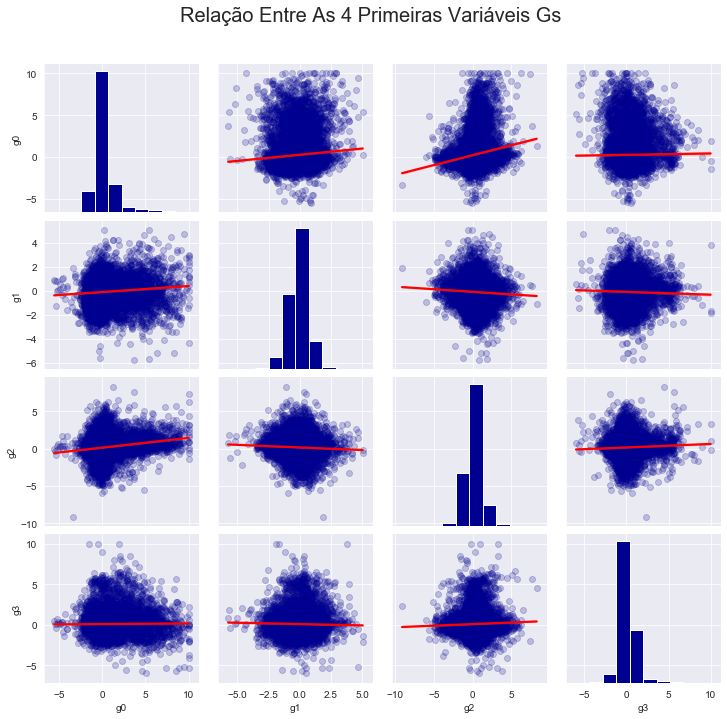

In [65]:
#Setando a cor
sns.set_palette(sns.color_palette("gnuplot2"))

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
g = sns.pairplot(data=data.loc[:, 'g0':'g3'], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})

#Plotando as legendas e mudando o tamanho das fontes
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relação Entre As 4 Primeiras Variáveis Gs', fontsize=20)
    
#Mostrando o gráfico
plt.show()

In [5]:
corr_gs = data.loc[:,'g0':'g771'].corr()
corr_gs.head()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713


In [7]:
corr_gs.reset_index()

,index,g0,g1,g2,g3,g4,g5,g6,g7,g8,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
0,g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
1,g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
2,g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
3,g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
4,g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
768,g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
769,g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
770,g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


## Achando as variáveis gs com mais relacionamento

In [9]:
corr_melt = pd.melt(corr_gs.reset_index(), id_vars=['index'])
corr_melt.head()

,index,variable,value
0,g0,g0,1.000000
1,g1,g0,0.086032
2,g2,g0,0.176188
3,g3,g0,0.011266
4,g4,g0,0.403153


In [31]:
corr_melt_sort = corr_melt.iloc[corr_melt['value'].abs().argsort()].reset_index(drop=True)
corr_melt_filtrado = corr_melt_sort.loc[corr_melt_sort['value'] != 1]
top_3_corr = corr_melt_filtrado.tail(3)
top_3_corr

,index,variable,value
595209,g672,g50,0.845668
595210,g37,g50,0.907061
595211,g50,g37,0.907061


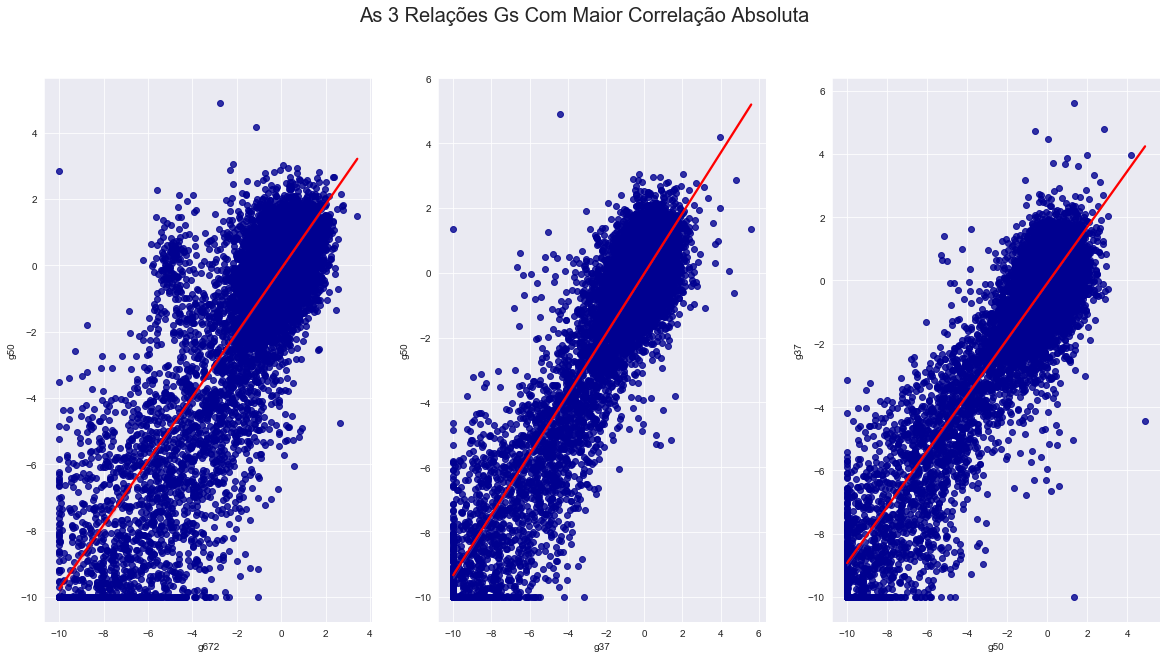

In [67]:
#Criando a figura
fig, ax = plt.subplots(1,3,figsize = (20,10))

#Setando a cor
sns.set_palette(sns.color_palette("gnuplot2"))

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.regplot(x=data.loc[:, top_3_corr['index'].iloc[0]], y=data.loc[:,top_3_corr['variable'].iloc[0]], ax=ax[0], line_kws={'color':'red'})
sns.regplot(x=data.loc[:, top_3_corr['index'].iloc[1]], y=data.loc[:,top_3_corr['variable'].iloc[1]], ax=ax[1], line_kws={'color':'red'})
sns.regplot(x=data.loc[:, top_3_corr['index'].iloc[2]], y=data.loc[:,top_3_corr['variable'].iloc[2]], ax=ax[2], line_kws={'color':'red'})


#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('As 3 Relações Gs Com Maior Correlação Absoluta', fontsize=20)
    
#Mostrando o gráfico
plt.show()

In [43]:
top3_neg = corr_melt_filtrado.loc[corr_melt_filtrado['value'] < 0].tail(3)
top3_neg

,index,variable,value
595181,g248,g760,-0.809137
595186,g349,g228,-0.820275
595187,g228,g349,-0.820275


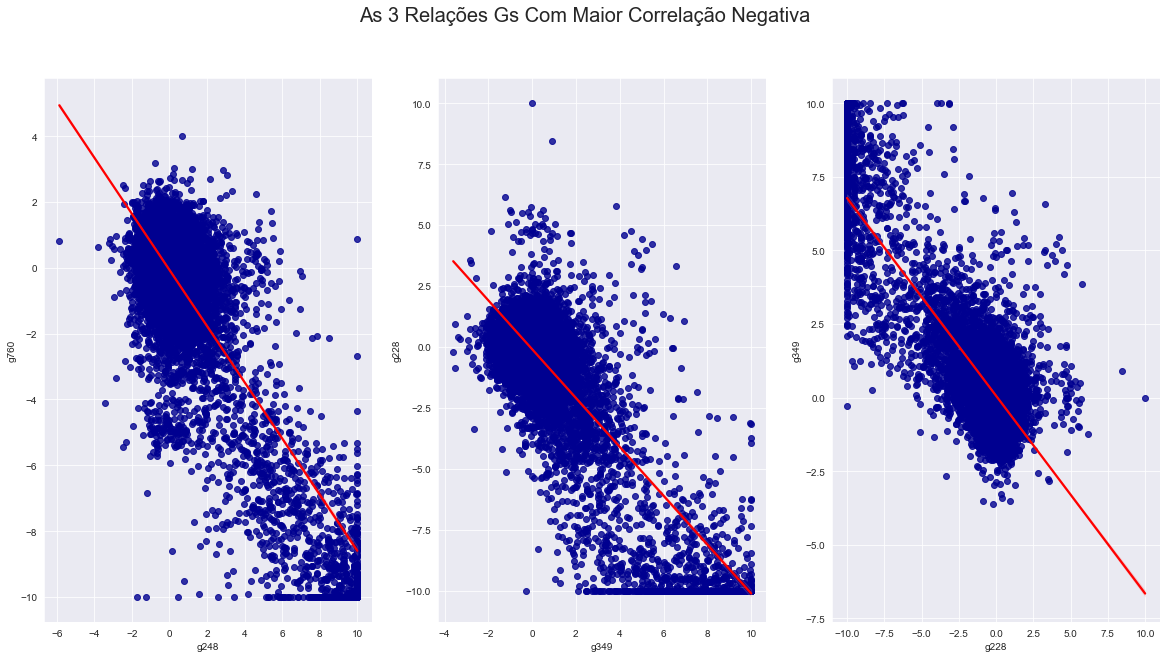

In [66]:
#Criando a figura
fig, ax = plt.subplots(1,3,figsize = (20,10))

#Setando a cor
sns.set_palette(sns.color_palette("gnuplot2"))

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.regplot(x=data.loc[:, top3_neg['index'].iloc[0]], y=data.loc[:,top3_neg['variable'].iloc[0]], ax=ax[0], line_kws={'color':'red'})
sns.regplot(x=data.loc[:, top3_neg['index'].iloc[1]], y=data.loc[:,top3_neg['variable'].iloc[1]], ax=ax[1], line_kws={'color':'red'})
sns.regplot(x=data.loc[:, top3_neg['index'].iloc[2]], y=data.loc[:,top3_neg['variable'].iloc[2]], ax=ax[2], line_kws={'color':'red'})


#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('As 3 Relações Gs Com Maior Correlação Negativa', fontsize=20)

#Mostrando o gráfico
plt.show()

# Desafio 5 e 6 - Calcular e analisar a correlação entre G e C, refletir sobre os efeitos biológicos e estudar o código que plota a matriz de correlação (heatmap)

In [317]:
corr_g = data.loc[:,'g0':'g50'].corr()
corr_g.head()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675


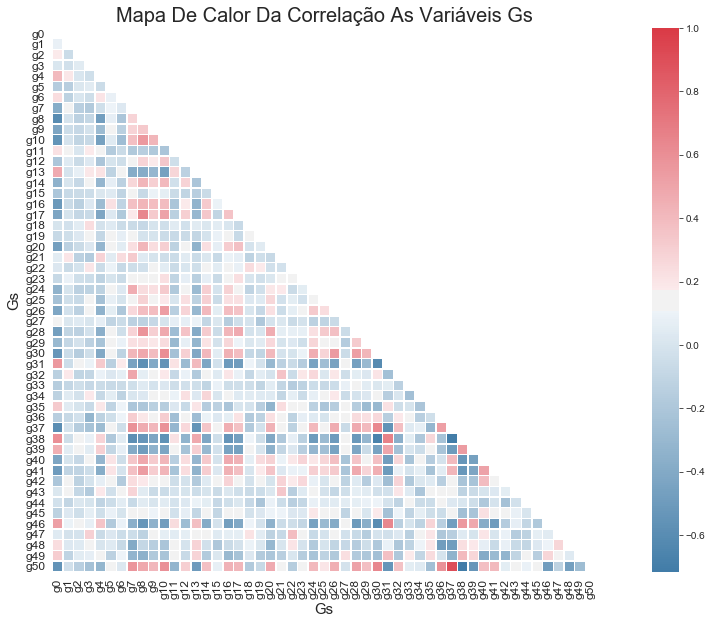

In [307]:
# Gerando a mascara para omitir a diagonal superior 
# A função np.ones_like gera um array de mesmo shape da matriz com apenas 1 e a np.triu filtrar a diagonal superior e o dtype=bool diz que esse 1 significa verdadeiro
# A partir disso essa matriz é passada como parâmetro pro seaborn e onde tem 1(Verdadeiro) ele omite
mask = np.triu(np.ones_like(coor_g, dtype=bool))

#Gerando a palheta de cores
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Criando o gráfico de calor
with sns.axes_style("white"):
    #Criando figura e eixos
    fig, ax = plt.subplots(figsize = (20,10))
    ax = sns.heatmap(coor_g, mask=mask, square=True, cmap=cmap, linewidths=.5)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Mapa De Calor Da Correlação As Variáveis Gs', fontsize=20)
plt.ylabel('Gs', fontsize=15)
plt.xlabel('Gs', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
    
#Mostrando o gráfico
plt.show()

In [282]:
corr = data.corr()
corr.head()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
tempo,1.000000,0.007610,0.043335,-0.162238,-0.031226,0.027241,-0.081324,-0.030058,0.003499,-0.024291,...,-0.056778,-0.053159,-0.079995,-0.032101,-0.064898,-0.112583,-0.067116,-0.067969,-0.088916,-0.075736
g0,0.007610,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,...,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g1,0.043335,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,...,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g2,-0.162238,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,...,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g3,-0.031226,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,...,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579


In [314]:
coor_g_c = corr.loc['c0':, 'g0':'g150']
coor_g_c.head()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150
c0,-0.624116,-0.037405,-0.168656,-0.037342,-0.403545,0.209358,-0.103316,0.486478,0.621422,0.435235,...,0.301867,-0.613501,0.206887,-0.696839,-0.508780,-0.368622,-0.750262,-0.464646,-0.036258,0.188516
c1,-0.624810,-0.030558,-0.178692,-0.093505,-0.379840,0.198890,-0.079528,0.553859,0.601678,0.475424,...,0.306495,-0.660329,0.213962,-0.680013,-0.549170,-0.419242,-0.776198,-0.564620,-0.032804,0.233742
c2,-0.639789,-0.039616,-0.176733,-0.085298,-0.392841,0.211988,-0.078782,0.565002,0.597372,0.488331,...,0.289753,-0.664456,0.196995,-0.700685,-0.548088,-0.448744,-0.776879,-0.549988,-0.041068,0.253080
c3,-0.604041,0.011899,-0.156894,-0.029079,-0.357850,0.193327,-0.093048,0.520284,0.564174,0.454065,...,0.292382,-0.609620,0.202679,-0.663536,-0.520016,-0.419634,-0.746047,-0.500957,-0.031831,0.210657
c4,-0.606231,-0.027014,-0.180127,-0.065964,-0.365118,0.206762,-0.055324,0.562647,0.545600,0.485965,...,0.272851,-0.644691,0.205254,-0.673378,-0.529062,-0.455812,-0.757262,-0.519478,-0.020960,0.274631


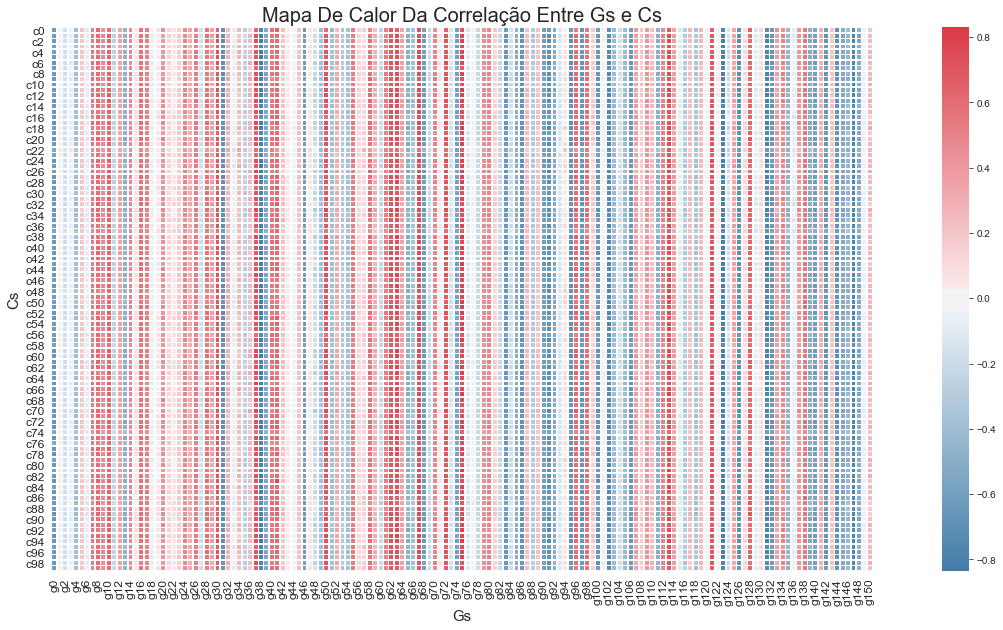

In [316]:
#Gerando a palheta de cores
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Criando o gráfico de calor
with sns.axes_style("white"):
    #Criando figura e eixos
    fig, ax = plt.subplots(figsize = (25,10))
    ax = sns.heatmap(coor_g_c, cmap=cmap, center=0,
            square=True, linewidths=.5)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Mapa De Calor Da Correlação Entre Gs e Cs', fontsize=20)
plt.ylabel('Cs', fontsize=15)
plt.xlabel('Gs', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
    
#Mostrando o gráfico
plt.show()

#### A partir do mapa de calor das 150 primeiras variáveis Gs e todas Cs podemos notar que em a relação de uma variável g com todas as variáveis c é muito próxima, podendo indicar que relação muito forte das variáveis g e c, as colunas da mesma cor indicam que uma variável g tem uma relação muito parecida com todas as variáveis Cs

#### Nesse caso não foi feito o uso da máscara pois são comparados diferentes variáveis no eixo x e no eixo y, ou seja a mesma análise não se repete

#### Com essas conclusões podemos imaginar que na verdade um composto tem um efeiro muito parecido na maior parte dos tipos celulares, ou seja, que para maior parte das drogas o efeito deve ser o mesmo pra todas células, partindo desse pressuposto podemos partir para análise das drogas que não estabeleceram esse padrão

# Resumo 

#### Nessa aula conseguimos observar as correlações entre as variáveis númericas, e estabelecer possíveis ligações entre os tipos de variáveis Gs e Cs e como um composto age em diferentes tipos celulares, vimos os diferentes modos de conseguir tirar a informação desejada, como a função crosstab e groupby

#### Vimos também um gráfico muito interessante a fim de visualizar essa correlação, o heatmap consegue de maneira clara transmitir a informação desejada para uma boa análise

Nome:Pedro Henrique Corrêa de Almeida

Linkedin:https://www.linkedin.com/feed/?trk=nav_back_to_linkedin